In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
%matplotlib inline

In [49]:
# import dataset

NASA_agro_climate_data = './agroclimate2.xls'
FAOSTAT_production_qty_csv = './FAOSTAT_data_prodQTY.csv'
FAOSTAT_panen = './FAOSTAT_data_panen.csv'
FAOSTAT_harvested_area = './FAOSTAT_data_area_harvested.csv'


In [50]:
from pandas import read_csv, read_excel

prod_qty = read_csv(FAOSTAT_production_qty_csv)

prod_qty_df = pd.DataFrame(prod_qty)
prod_qty_df.head(10)


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Production Quantity,Flag,Flag Description
0,QCL,Crops and livestock products,360,Indonesia,5510,Production,1491.01,Oil palm fruit,1981,1981,tonnes,3800000,E,Estimated value
1,QCL,Crops and livestock products,360,Indonesia,5510,Production,1491.01,Oil palm fruit,1982,1982,tonnes,4300000,E,Estimated value
2,QCL,Crops and livestock products,360,Indonesia,5510,Production,1491.01,Oil palm fruit,1983,1983,tonnes,4600000,E,Estimated value
3,QCL,Crops and livestock products,360,Indonesia,5510,Production,1491.01,Oil palm fruit,1984,1984,tonnes,6280000,E,Estimated value
4,QCL,Crops and livestock products,360,Indonesia,5510,Production,1491.01,Oil palm fruit,1985,1985,tonnes,6550000,E,Estimated value
5,QCL,Crops and livestock products,360,Indonesia,5510,Production,1491.01,Oil palm fruit,1986,1986,tonnes,7725000,E,Estimated value
6,QCL,Crops and livestock products,360,Indonesia,5510,Production,1491.01,Oil palm fruit,1987,1987,tonnes,8859147,A,Official figure
7,QCL,Crops and livestock products,360,Indonesia,5510,Production,1491.01,Oil palm fruit,1988,1988,tonnes,10785847,A,Official figure
8,QCL,Crops and livestock products,360,Indonesia,5510,Production,1491.01,Oil palm fruit,1989,1989,tonnes,10232890,A,Official figure
9,QCL,Crops and livestock products,360,Indonesia,5510,Production,1491.01,Oil palm fruit,1990,1990,tonnes,11151795,A,Official figure


In [51]:
crop_yield = read_csv(FAOSTAT_panen)

crop_yield_df = pd.DataFrame(crop_yield)
crop_yield.head(10)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Crop Yield,Flag,Flag Description
0,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1491.01,Oil palm fruit,1981,1981,hg/ha,165217,I,Imputed value
1,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1491.01,Oil palm fruit,1982,1982,hg/ha,179391,I,Imputed value
2,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1491.01,Oil palm fruit,1983,1983,hg/ha,180180,I,Imputed value
3,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1491.01,Oil palm fruit,1984,1984,hg/ha,211947,I,Imputed value
4,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1491.01,Oil palm fruit,1985,1985,hg/ha,187841,I,Imputed value
5,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1491.01,Oil palm fruit,1986,1986,hg/ha,206496,I,Imputed value
6,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1491.01,Oil palm fruit,1987,1987,hg/ha,210132,E,Estimated value
7,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1491.01,Oil palm fruit,1988,1988,hg/ha,201605,E,Estimated value
8,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1491.01,Oil palm fruit,1989,1989,hg/ha,173439,E,Estimated value
9,QCL,Crops and livestock products,360,Indonesia,5419,Yield,1491.01,Oil palm fruit,1990,1990,hg/ha,165695,E,Estimated value


In [52]:
area_harvested = read_csv(FAOSTAT_harvested_area)

harvested_area_df = pd.DataFrame(area_harvested)
harvested_area_df.head(10)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Harvested Area,Flag,Flag Description
0,QCL,Crops and livestock products,360,Indonesia,5312,Area harvested,1491.01,Oil palm fruit,1981,1981,ha,230000,A,Official figure
1,QCL,Crops and livestock products,360,Indonesia,5312,Area harvested,1491.01,Oil palm fruit,1982,1982,ha,239700,A,Official figure
2,QCL,Crops and livestock products,360,Indonesia,5312,Area harvested,1491.01,Oil palm fruit,1983,1983,ha,255300,A,Official figure
3,QCL,Crops and livestock products,360,Indonesia,5312,Area harvested,1491.01,Oil palm fruit,1984,1984,ha,296300,A,Official figure
4,QCL,Crops and livestock products,360,Indonesia,5312,Area harvested,1491.01,Oil palm fruit,1985,1985,ha,348700,A,Official figure
5,QCL,Crops and livestock products,360,Indonesia,5312,Area harvested,1491.01,Oil palm fruit,1986,1986,ha,374100,A,Official figure
6,QCL,Crops and livestock products,360,Indonesia,5312,Area harvested,1491.01,Oil palm fruit,1987,1987,ha,421600,A,Official figure
7,QCL,Crops and livestock products,360,Indonesia,5312,Area harvested,1491.01,Oil palm fruit,1988,1988,ha,535000,A,Official figure
8,QCL,Crops and livestock products,360,Indonesia,5312,Area harvested,1491.01,Oil palm fruit,1989,1989,ha,590000,A,Official figure
9,QCL,Crops and livestock products,360,Indonesia,5312,Area harvested,1491.01,Oil palm fruit,1990,1990,ha,673033,A,Official figure


In [53]:
agroclimate = read_excel(NASA_agro_climate_data)

agroclimate_df = pd.DataFrame(agroclimate)
agroclimate_df.head()

,Year,TS,T2M,QV2M,RH2M,T2MDEW,T2MWET,GWETTOP,T2M_MAX,T2M_MIN,GWETPROF,GWETROOT,T2M_RANGE,PRECTOTCORR,PRECTOTCORR_SUM,ALLSKY_SFC_LW_DWN
0,1981,25.65,25.72,18.37,89.38,23.73,24.72,0.83,31.25,20.94,0.92,0.84,10.31,6.12,2146.29,-999.00
1,1982,25.44,25.52,18.07,88.94,23.45,24.49,0.73,31.48,19.59,0.81,0.71,11.88,4.89,1708.59,-999.00
2,1983,25.90,25.98,18.49,88.69,23.84,24.91,0.80,32.08,20.88,0.89,0.80,11.20,6.40,2235.94,-999.00
3,1984,25.19,25.30,18.07,90.06,23.46,24.38,0.86,30.87,21.15,0.95,0.89,9.71,6.33,2193.75,425.61
4,1985,25.36,25.48,18.07,89.19,23.45,24.47,0.80,31.50,20.69,0.90,0.82,10.80,6.02,2098.83,421.78


Data Cleaning

In [54]:
# checking missing value

prod_qty_df.isnull().sum()

Domain Code            0
Domain                 0
Area Code (M49)        0
Area                   0
Element Code           0
Element                0
Item Code (CPC)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Production Quantity    0
Flag                   0
Flag Description       0
dtype: int64

In [55]:

crop_yield_df.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Crop Yield          0
Flag                0
Flag Description    0
dtype: int64

In [56]:

harvested_area_df.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Harvested Area      0
Flag                0
Flag Description    0
dtype: int64

In [57]:
agroclimate_df.isnull().sum()

Year                 0
TS                   0
T2M                  0
QV2M                 0
RH2M                 0
T2MDEW               0
T2MWET               0
GWETTOP              0
T2M_MAX              0
T2M_MIN              0
GWETPROF             0
GWETROOT             0
T2M_RANGE            0
PRECTOTCORR          0
PRECTOTCORR_SUM      0
ALLSKY_SFC_LW_DWN    0
dtype: int64

In [58]:
# checking duplicate data

print(f'prod_qty_df: {prod_qty_df.duplicated().sum()}')
print(f'crop_yield_df: {crop_yield_df.duplicated().sum()}')
print(f'harvested_area_df: {harvested_area_df.duplicated().sum()}')
print(f'agroclimate_df: {agroclimate_df.duplicated().sum()}')

prod_qty_df: 0
crop_yield_df: 0
harvested_area_df: 0
agroclimate_df: 0


Data Frame Merging and deletion

In [59]:
# drop all column exept value

prod_qty_df.drop(columns=['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Unit', 'Flag', 'Flag Description'], axis=1, inplace=True)
prod_qty_df.head(5)

,Year,Production Quantity
0,1981,3800000
1,1982,4300000
2,1983,4600000
3,1984,6280000
4,1985,6550000


In [60]:
harvested_area_df.drop(columns=['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Unit', 'Flag', 'Flag Description', 'Year'], axis=1, inplace=True)
harvested_area_df.head(5)

,Harvested Area
0,230000
1,239700
2,255300
3,296300
4,348700


In [61]:
crop_yield_df.drop(columns=['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Unit', 'Year', 'Flag', 'Flag Description'], axis=1, inplace=True)
crop_yield_df.head(5)

,Crop Yield
0,165217
1,179391
2,180180
3,211947
4,187841


In [62]:
# merging dataframe from 3 FAOSTAT data

faostat = [prod_qty_df, crop_yield_df, harvested_area_df]

faostat_df = pd.concat(faostat, axis=1)
faostat_df.head(5)

,Year,Production Quantity,Crop Yield,Harvested Area
0,1981,3800000,165217,230000
1,1982,4300000,179391,239700
2,1983,4600000,180180,255300
3,1984,6280000,211947,296300
4,1985,6550000,187841,348700


In [63]:
faostat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 40 non-null     int64
 1   Production Quantity  40 non-null     int64
 2   Crop Yield           40 non-null     int64
 3   Harvested Area       40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


In [64]:
faostat_df.describe()

,Year,Production Quantity,Crop Yield,Harvested Area
count,40.000000,4.000000e+01,40.000000,4.000000e+01
mean,2000.500000,7.791797e+07,178114.475000,4.483448e+06
std,11.690452,8.229456e+07,13845.334558,4.801609e+06
min,1981.000000,3.800000e+06,151349.000000,2.300000e+05
25%,1990.750000,1.190286e+07,170960.500000,7.474420e+05
50%,2000.500000,3.866500e+07,172906.500000,2.107000e+06
75%,2010.250000,1.481071e+08,185866.000000,8.537252e+06
max,2020.000000,2.565286e+08,211947.000000,1.499601e+07


In [65]:
# merging data faostat & agroclimate nasa

# remove volumn "YEAR on faostat"
faostat_df.drop(columns=['Year'], axis=1, inplace=True)

In [66]:
data = [agroclimate_df, faostat_df]
data = pd.concat(data, axis=1)

data.head()

,Year,TS,T2M,QV2M,RH2M,T2MDEW,T2MWET,GWETTOP,T2M_MAX,T2M_MIN,GWETPROF,GWETROOT,T2M_RANGE,PRECTOTCORR,PRECTOTCORR_SUM,ALLSKY_SFC_LW_DWN,Production Quantity,Crop Yield,Harvested Area
0,1981,25.65,25.72,18.37,89.38,23.73,24.72,0.83,31.25,20.94,0.92,0.84,10.31,6.12,2146.29,-999.00,3800000,165217,230000
1,1982,25.44,25.52,18.07,88.94,23.45,24.49,0.73,31.48,19.59,0.81,0.71,11.88,4.89,1708.59,-999.00,4300000,179391,239700
2,1983,25.90,25.98,18.49,88.69,23.84,24.91,0.80,32.08,20.88,0.89,0.80,11.20,6.40,2235.94,-999.00,4600000,180180,255300
3,1984,25.19,25.30,18.07,90.06,23.46,24.38,0.86,30.87,21.15,0.95,0.89,9.71,6.33,2193.75,425.61,6280000,211947,296300
4,1985,25.36,25.48,18.07,89.19,23.45,24.47,0.80,31.50,20.69,0.90,0.82,10.80,6.02,2098.83,421.78,6550000,187841,348700


In [67]:
data.drop(columns=['Year'], axis=1, inplace=True)

Check data distribution after megring

In [68]:
data.describe()

,TS,T2M,QV2M,RH2M,T2MDEW,T2MWET,GWETTOP,T2M_MAX,T2M_MIN,GWETPROF,GWETROOT,T2M_RANGE,PRECTOTCORR,PRECTOTCORR_SUM,ALLSKY_SFC_LW_DWN,Production Quantity,Crop Yield,Harvested Area
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,4.000000e+01,40.000000,4.000000e+01
mean,25.795750,25.898000,18.770000,90.258500,24.087750,24.993750,0.838000,31.445500,20.970000,0.924000,0.859250,10.47475,6.331750,2213.921000,313.249750,7.791797e+07,178114.475000,4.483448e+06
std,0.248492,0.252923,0.326339,0.653054,0.285877,0.260716,0.048049,0.351662,0.586712,0.042535,0.062486,0.63084,1.034517,377.122622,378.429146,8.229456e+07,13845.334558,4.801609e+06
min,25.190000,25.300000,18.070000,88.690000,23.450000,24.380000,0.700000,30.690000,19.430000,0.790000,0.700000,9.50000,4.350000,1492.380000,-999.000000,3.800000e+06,151349.000000,2.300000e+05
25%,25.650000,25.737500,18.602500,89.862500,23.947500,24.887500,0.807500,31.250000,20.662500,0.900000,0.820000,10.06500,5.635000,1956.445000,417.307500,1.190286e+07,170960.500000,7.474420e+05
50%,25.775000,25.875000,18.800000,90.380000,24.125000,25.000000,0.850000,31.435000,20.985000,0.945000,0.875000,10.41000,6.305000,2206.935000,418.890000,3.866500e+07,172906.500000,2.107000e+06
75%,25.907500,26.035000,18.935000,90.750000,24.245000,25.132500,0.870000,31.762500,21.342500,0.950000,0.900000,10.76250,6.862500,2413.917500,421.705000,1.481071e+08,185866.000000,8.537252e+06
max,26.390000,26.480000,19.590000,91.560000,24.770000,25.620000,0.910000,32.080000,22.110000,0.980000,0.950000,12.64000,8.780000,3074.410000,425.610000,2.565286e+08,211947.000000,1.499601e+07


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TS                   40 non-null     float64
 1   T2M                  40 non-null     float64
 2   QV2M                 40 non-null     float64
 3   RH2M                 40 non-null     float64
 4   T2MDEW               40 non-null     float64
 5   T2MWET               40 non-null     float64
 6   GWETTOP              40 non-null     float64
 7   T2M_MAX              40 non-null     float64
 8   T2M_MIN              40 non-null     float64
 9   GWETPROF             40 non-null     float64
 10  GWETROOT             40 non-null     float64
 11  T2M_RANGE            40 non-null     float64
 12  PRECTOTCORR          40 non-null     float64
 13  PRECTOTCORR_SUM      40 non-null     float64
 14  ALLSKY_SFC_LW_DWN    40 non-null     float64
 15  Production Quantity  40 non-null     int64

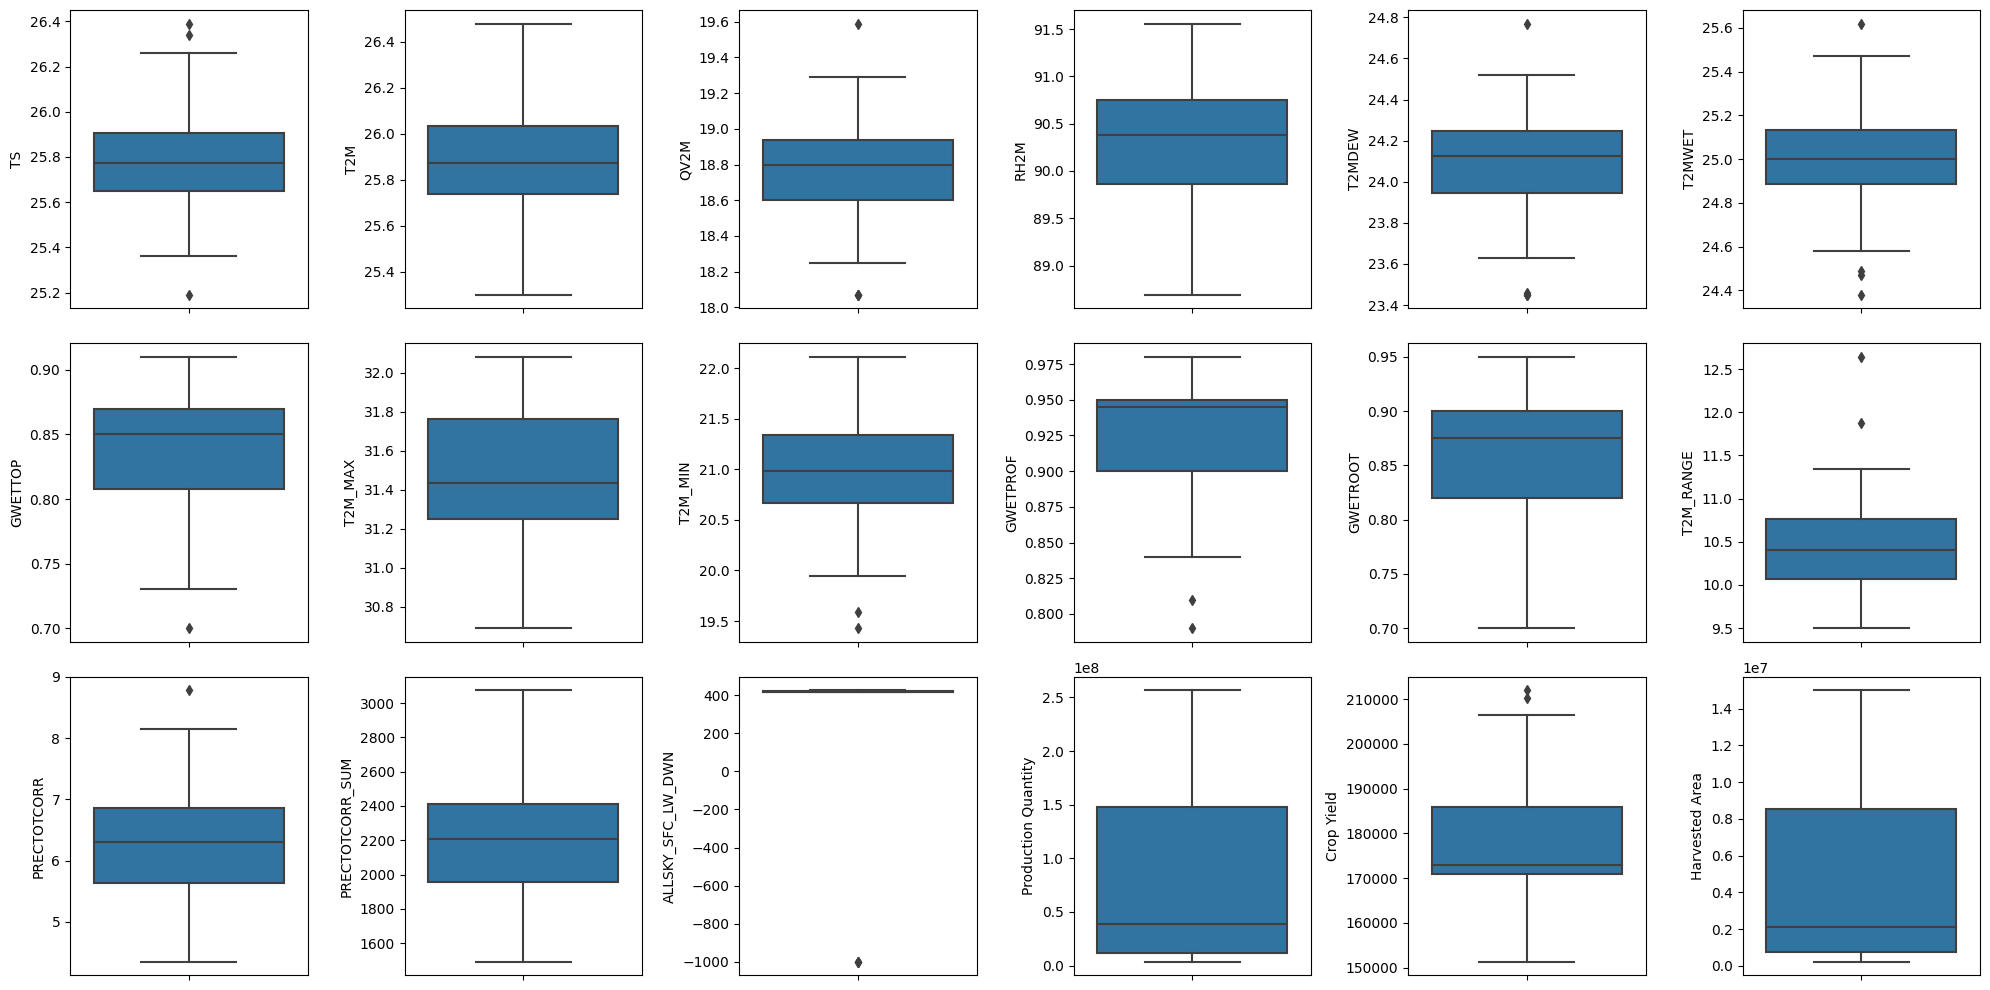

In [70]:
fig, axs, = plt.subplots(ncols=6, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k, v in data.items():
    sns.boxplot(y=k, data = data, ax = axs[index])
    index += 1

plt.tight_layout()

In [71]:
# checking outlier percentage

for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1

    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]

    print('Column {} Outliers {:.2f}%'.format(k, perc))

Column TS Outliers 7.50%
Column T2M Outliers 0.00%
Column QV2M Outliers 10.00%
Column RH2M Outliers 0.00%
Column T2MDEW Outliers 10.00%
Column T2MWET Outliers 10.00%
Column GWETTOP Outliers 2.50%
Column T2M_MAX Outliers 0.00%
Column T2M_MIN Outliers 5.00%
Column GWETPROF Outliers 5.00%
Column GWETROOT Outliers 0.00%
Column T2M_RANGE Outliers 5.00%
Column PRECTOTCORR Outliers 2.50%
Column PRECTOTCORR_SUM Outliers 0.00%
Column ALLSKY_SFC_LW_DWN Outliers 7.50%
Column Production Quantity Outliers 0.00%
Column Crop Yield Outliers 5.00%
Column Harvested Area Outliers 0.00%


C:\Users\malik\AppData\Local\Temp\ipykernel_11688\2461719023.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\malik\AppData\Local\Temp\ipykernel_11688\2461719023.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\malik\AppData\Local\Temp\

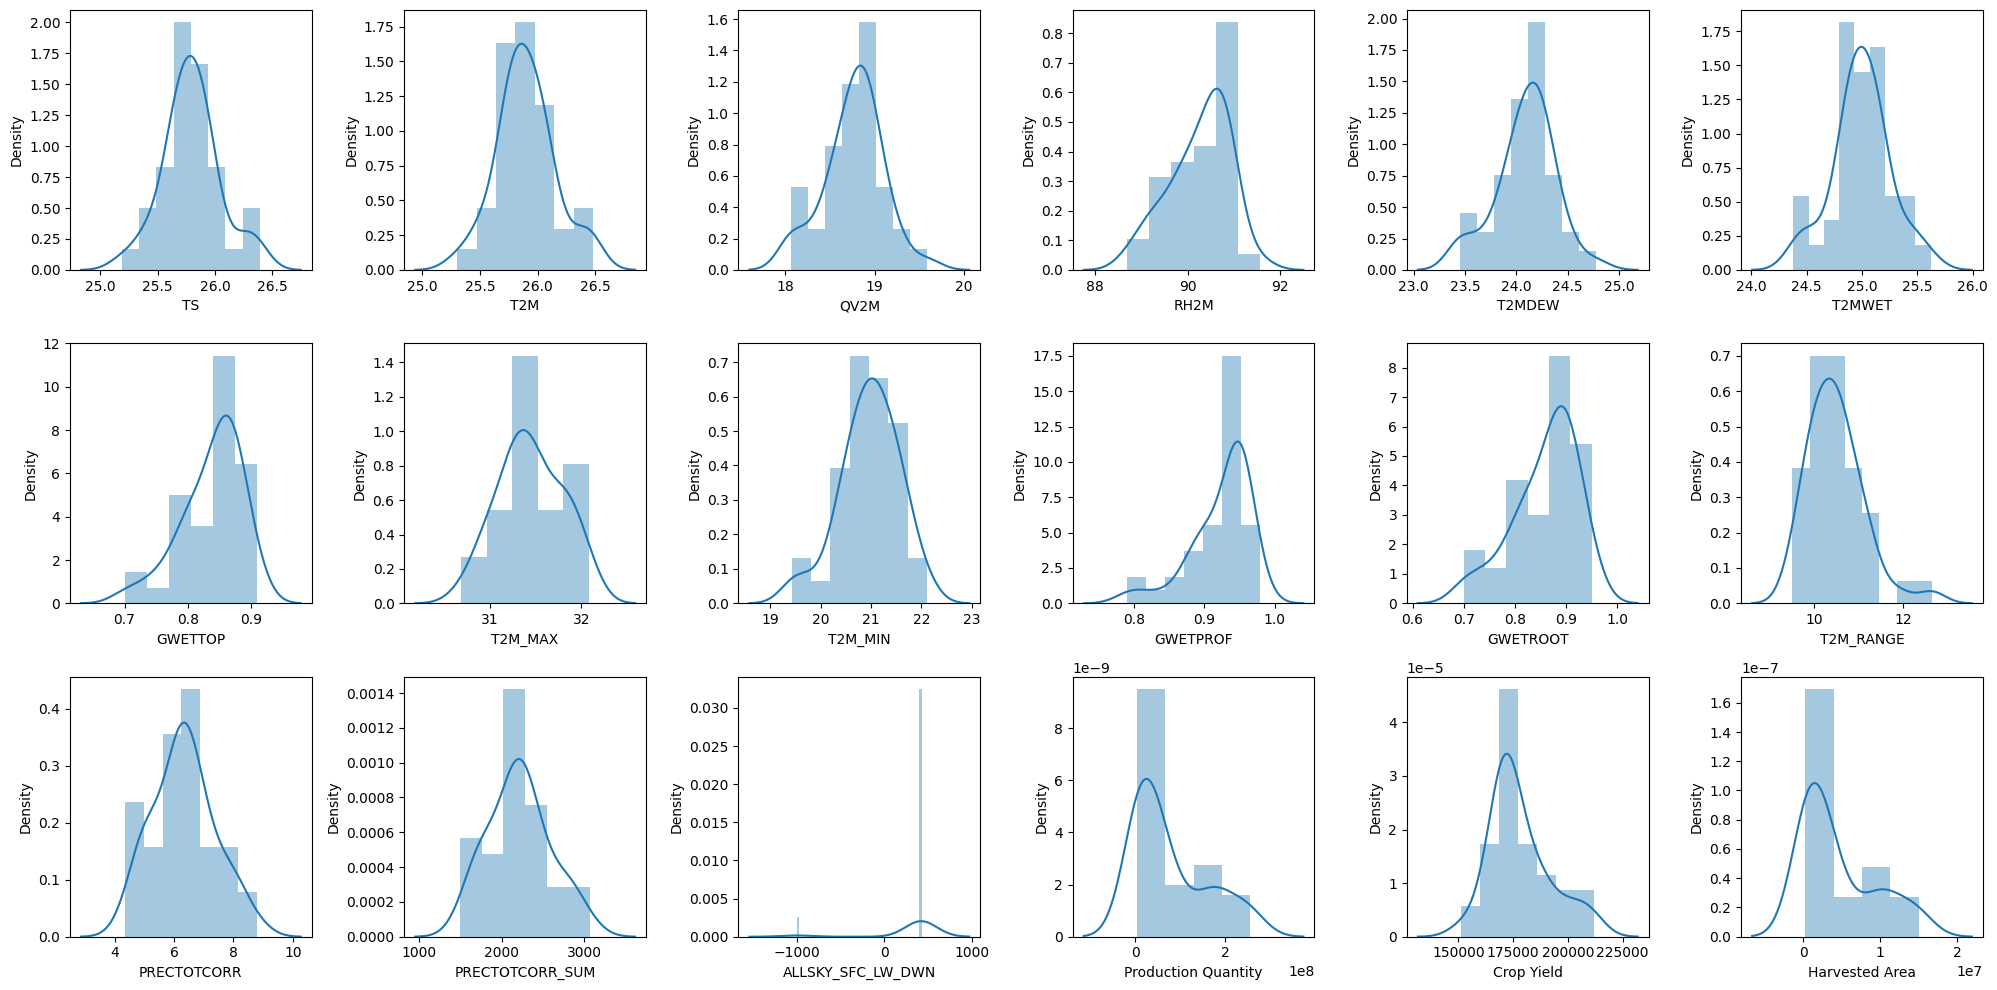

In [72]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20,10))
index = 0
axs = axs.flatten()

for k, v in data.items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout()

In [73]:
# checking skewness kurtosis

index = 0

for k, v in data.items():
  print('Feature {} Skewness = {:.7f}'.format(k, data[k].skew()))
  print('Feature {} Kurtosis = {:.7f}'.format(k, data[k].kurt()))
  index += 1

Feature TS Skewness = 0.2406374
Feature TS Kurtosis = 0.8363698
Feature T2M Skewness = 0.2707823
Feature T2M Kurtosis = 0.5723864
Feature QV2M Skewness = -0.2786897
Feature QV2M Kurtosis = 0.6401117
Feature RH2M Skewness = -0.5879201
Feature RH2M Kurtosis = -0.2071057
Feature T2MDEW Skewness = -0.4444030
Feature T2MDEW Kurtosis = 0.6568880
Feature T2MWET Skewness = -0.0981750
Feature T2MWET Kurtosis = 0.6765944
Feature GWETTOP Skewness = -0.9550889
Feature GWETTOP Kurtosis = 0.7357078
Feature T2M_MAX Skewness = -0.0040353
Feature T2M_MAX Kurtosis = -0.6627789
Feature T2M_MIN Skewness = -0.5514657
Feature T2M_MIN Kurtosis = 0.5227972
Feature GWETPROF Skewness = -1.4980589
Feature GWETPROF Kurtosis = 2.1615314
Feature GWETROOT Skewness = -0.8883621
Feature GWETROOT Kurtosis = 0.3011105
Feature T2M_RANGE Skewness = 1.1899784
Feature T2M_RANGE Kurtosis = 2.4924794
Feature PRECTOTCORR Skewness = 0.2627591
Feature PRECTOTCORR Kurtosis = -0.2596547
Feature PRECTOTCORR_SUM Skewness = 0.2583623


 mu = 25.80 and sigma = 0.25



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


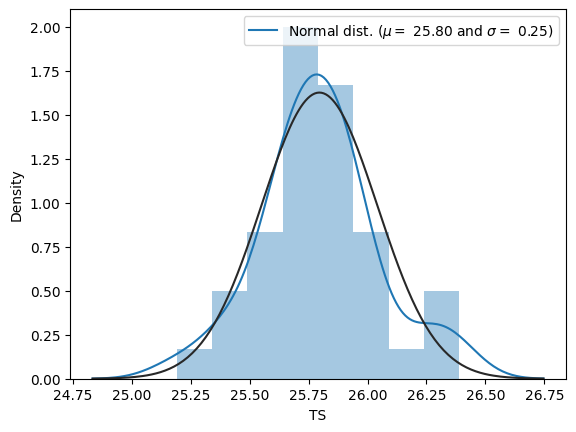

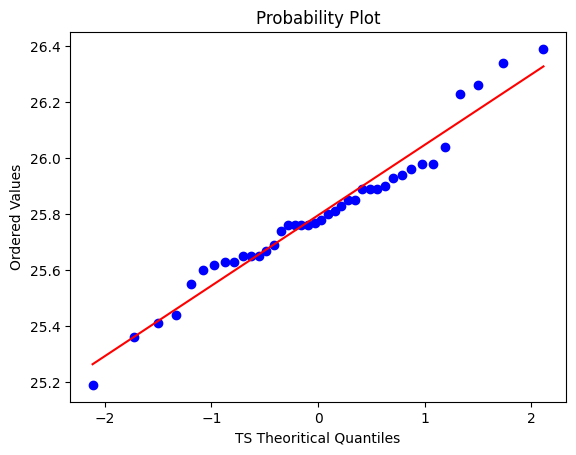


 mu = 25.90 and sigma = 0.25



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


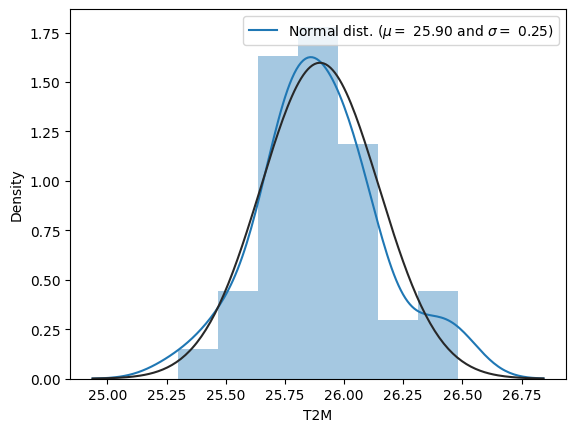

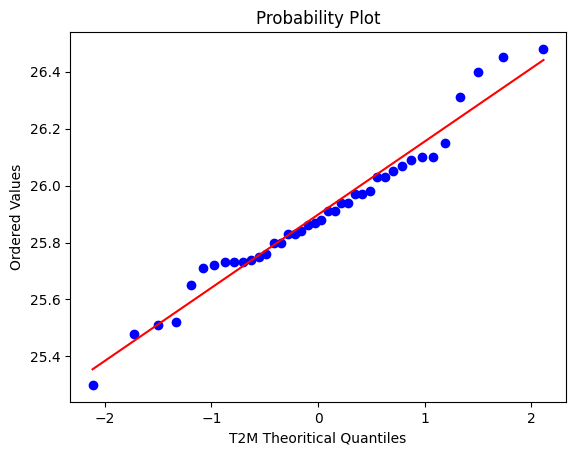


 mu = 18.77 and sigma = 0.32



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


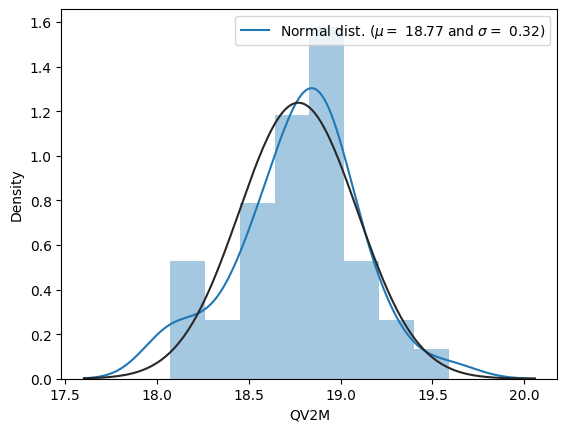

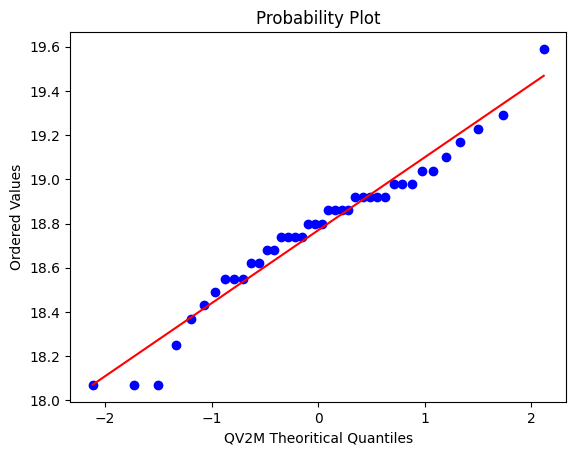


 mu = 90.26 and sigma = 0.64



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


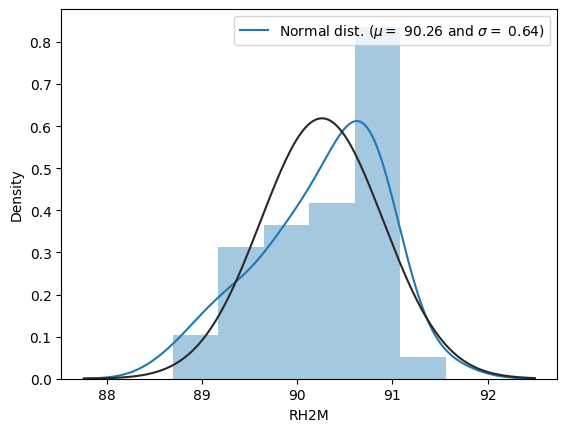

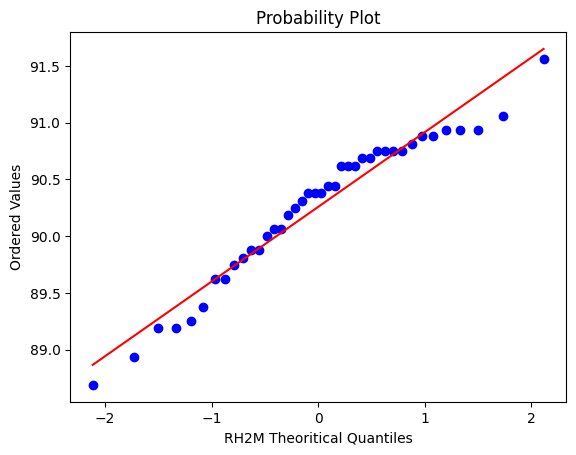


 mu = 24.09 and sigma = 0.28



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


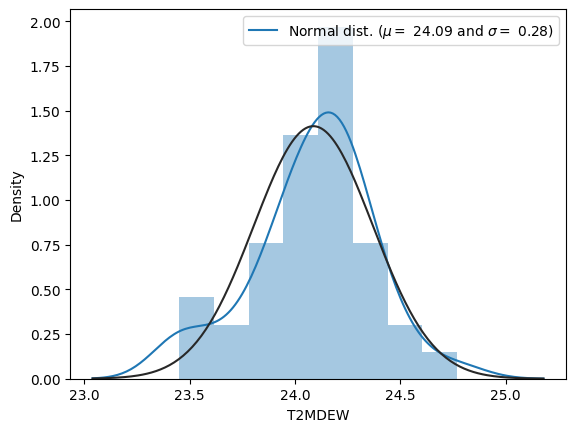

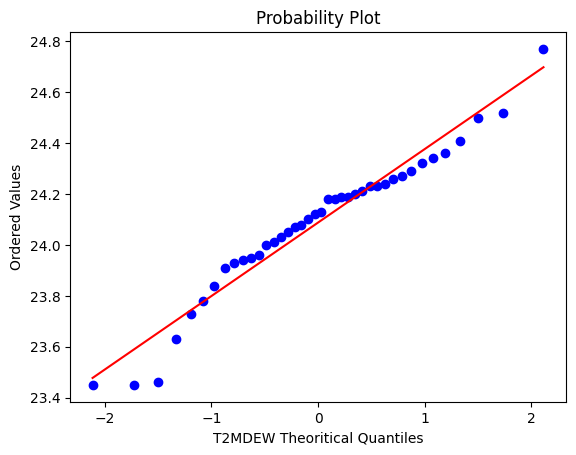


 mu = 24.99 and sigma = 0.26



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


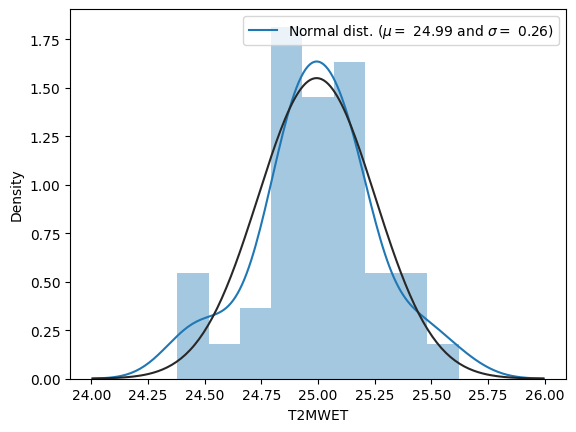

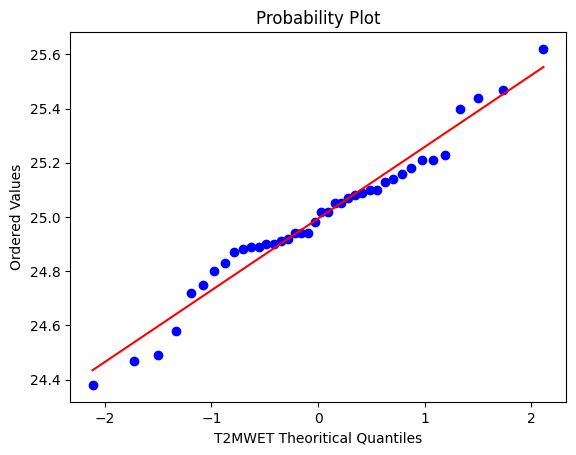

C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)



 mu = 0.84 and sigma = 0.05



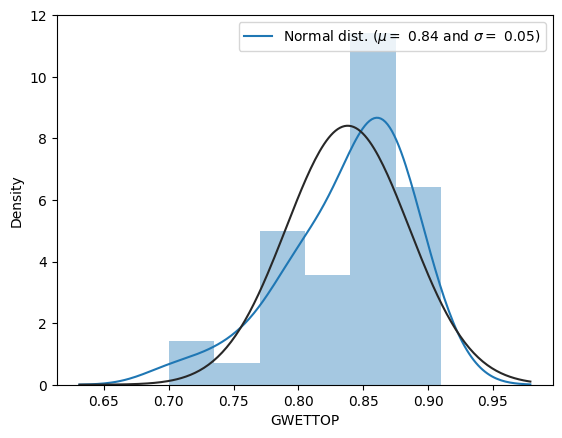

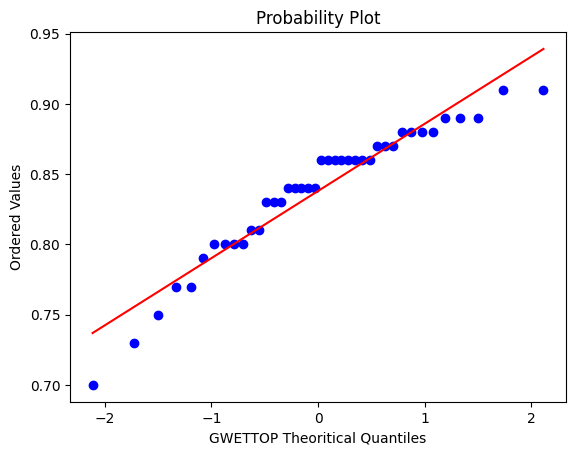


 mu = 31.45 and sigma = 0.35



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


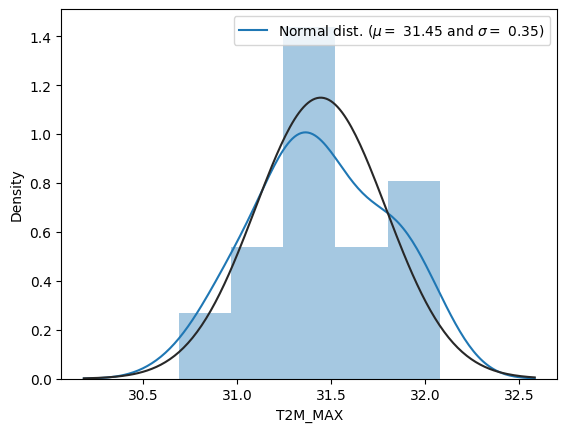

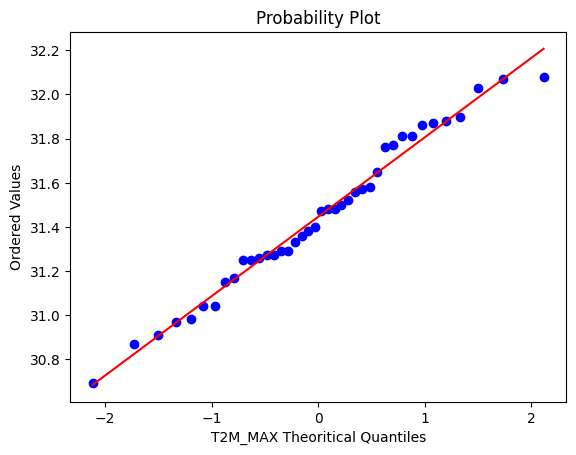


 mu = 20.97 and sigma = 0.58



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


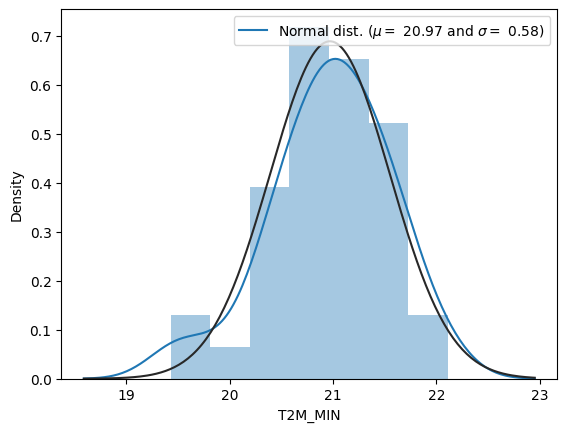

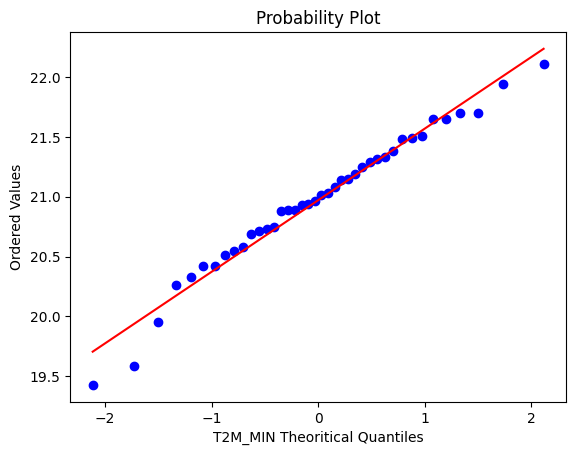


 mu = 0.92 and sigma = 0.04



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


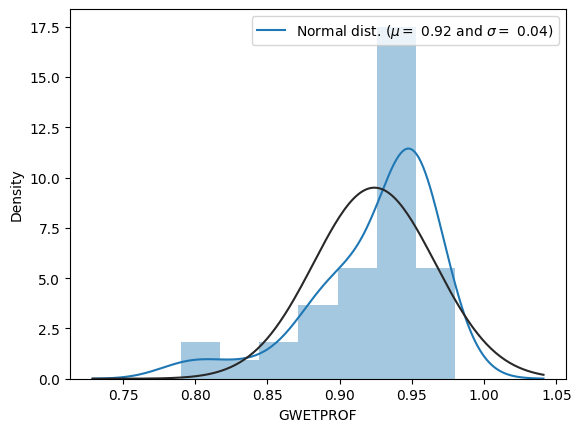

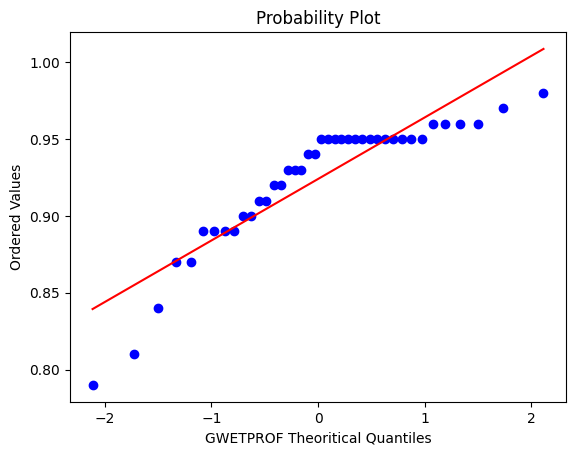


 mu = 0.86 and sigma = 0.06



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


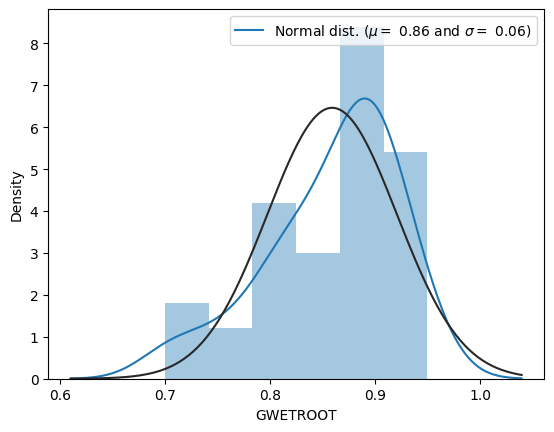

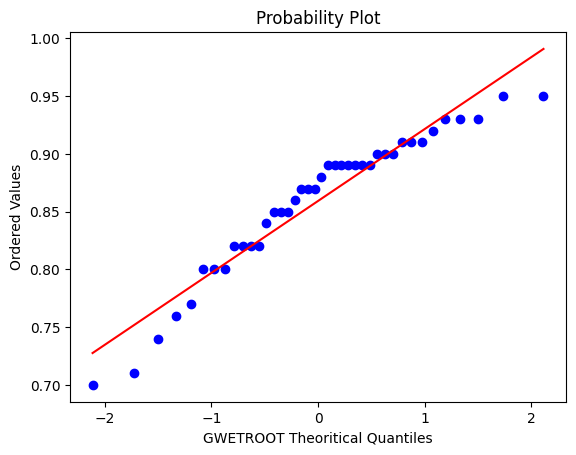


 mu = 10.47 and sigma = 0.62



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


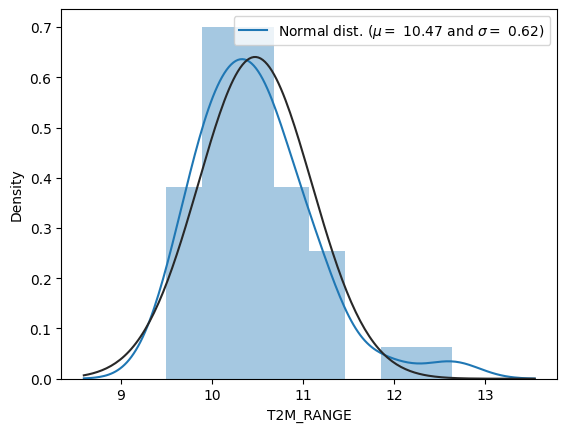

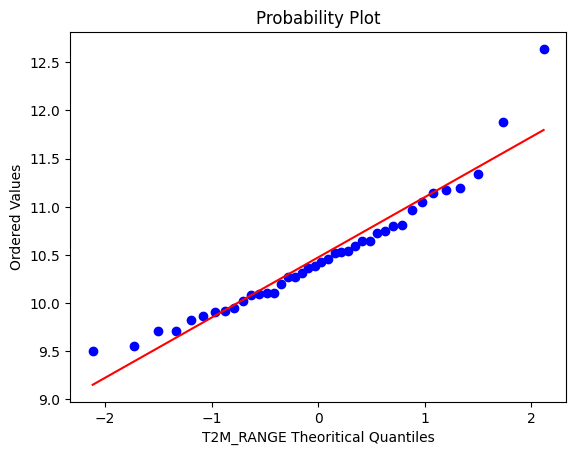


 mu = 6.33 and sigma = 1.02



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


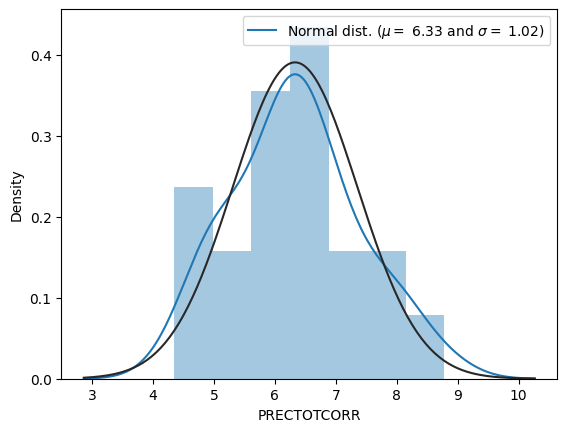

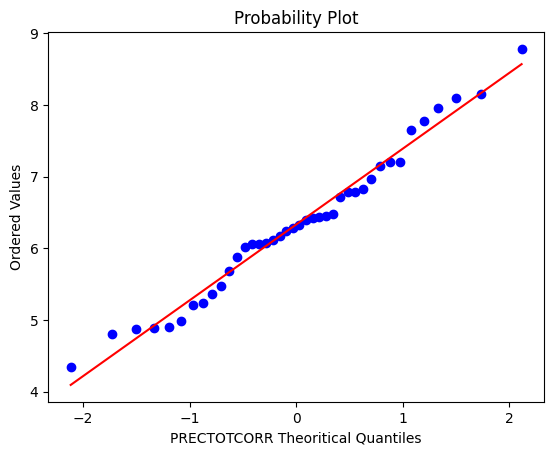


 mu = 2213.92 and sigma = 372.38



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


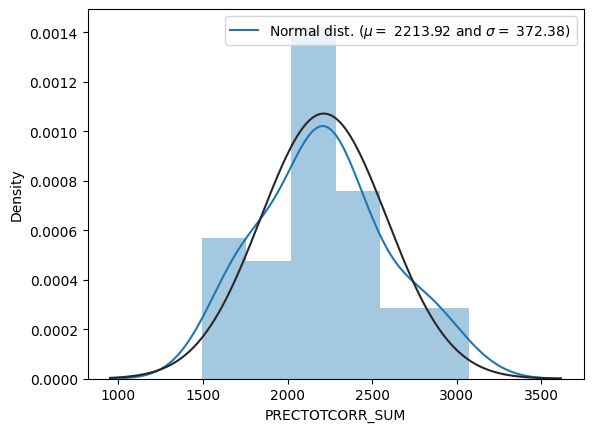

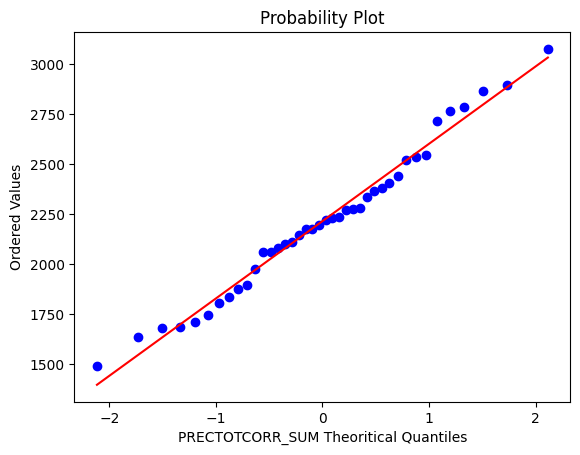


 mu = 313.25 and sigma = 373.67



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


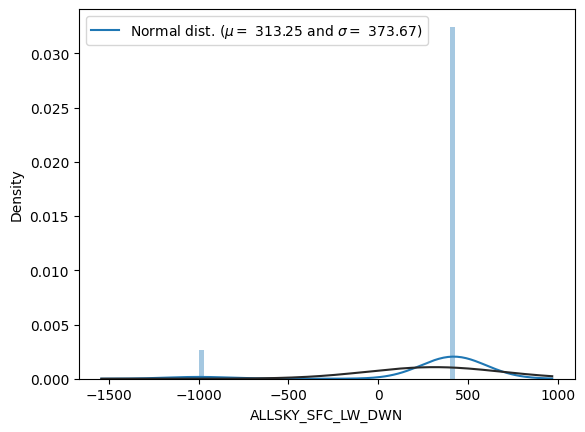

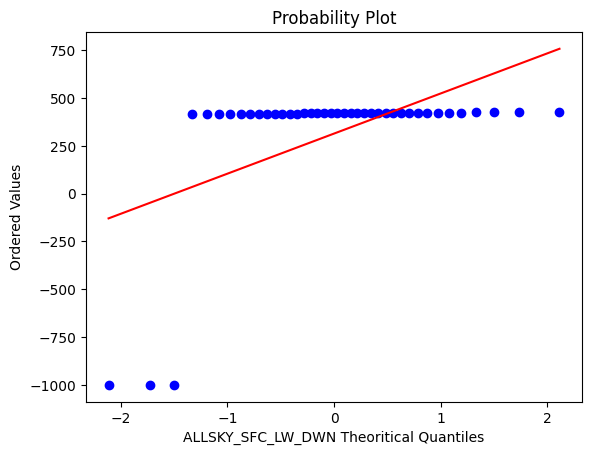


 mu = 77917969.08 and sigma = 81259368.00



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


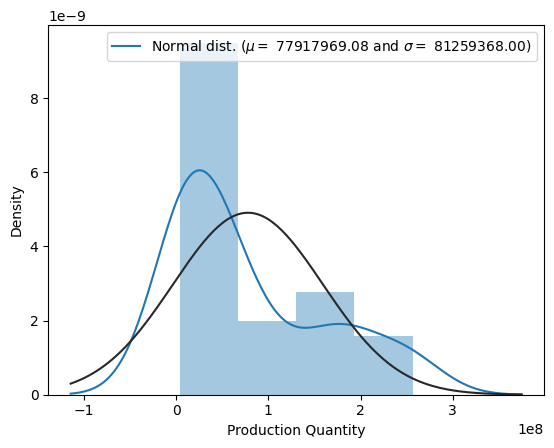

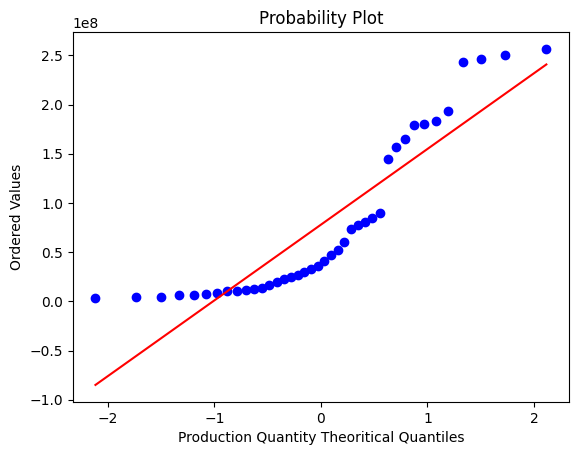


 mu = 178114.48 and sigma = 13671.17



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


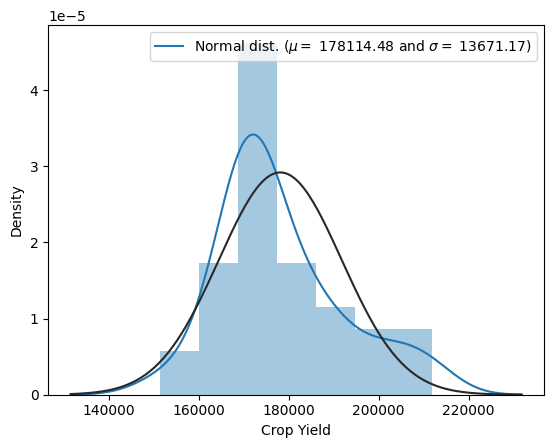

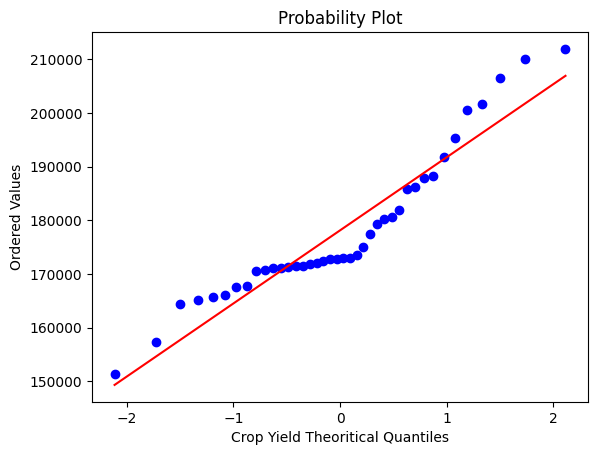


 mu = 4483447.80 and sigma = 4741209.42



C:\Users\malik\AppData\Local\Temp\ipykernel_11688\3838853447.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[k], fit=norm)


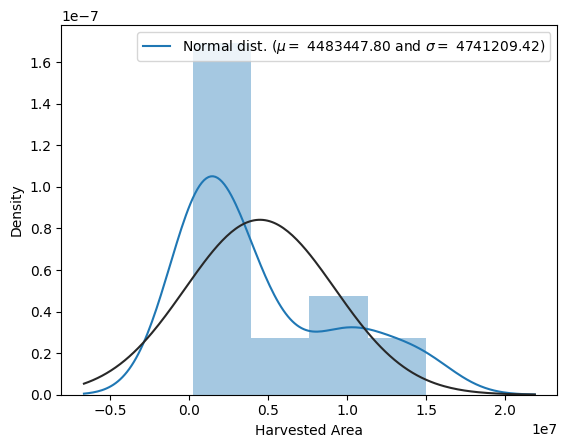

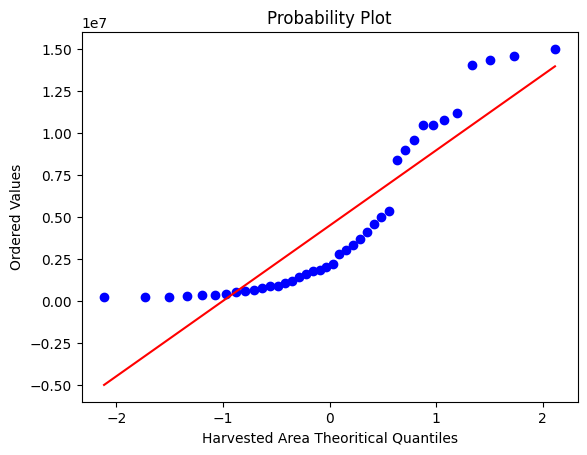

In [74]:
from scipy import stats
from scipy.stats import norm, skew

fig, axs = plt.subplots()
index = 0

for k, v in data.items():
  sns.distplot(data[k], fit=norm)

  (mu, sigma) = norm.fit(data[k])
  print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

  plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')

  fig = plt.figure()
  res = stats.probplot(data[k], plot=plt)
  plt.xlabel('{} Theoritical Quantiles'.format(k))
  plt.show()

  index += 1

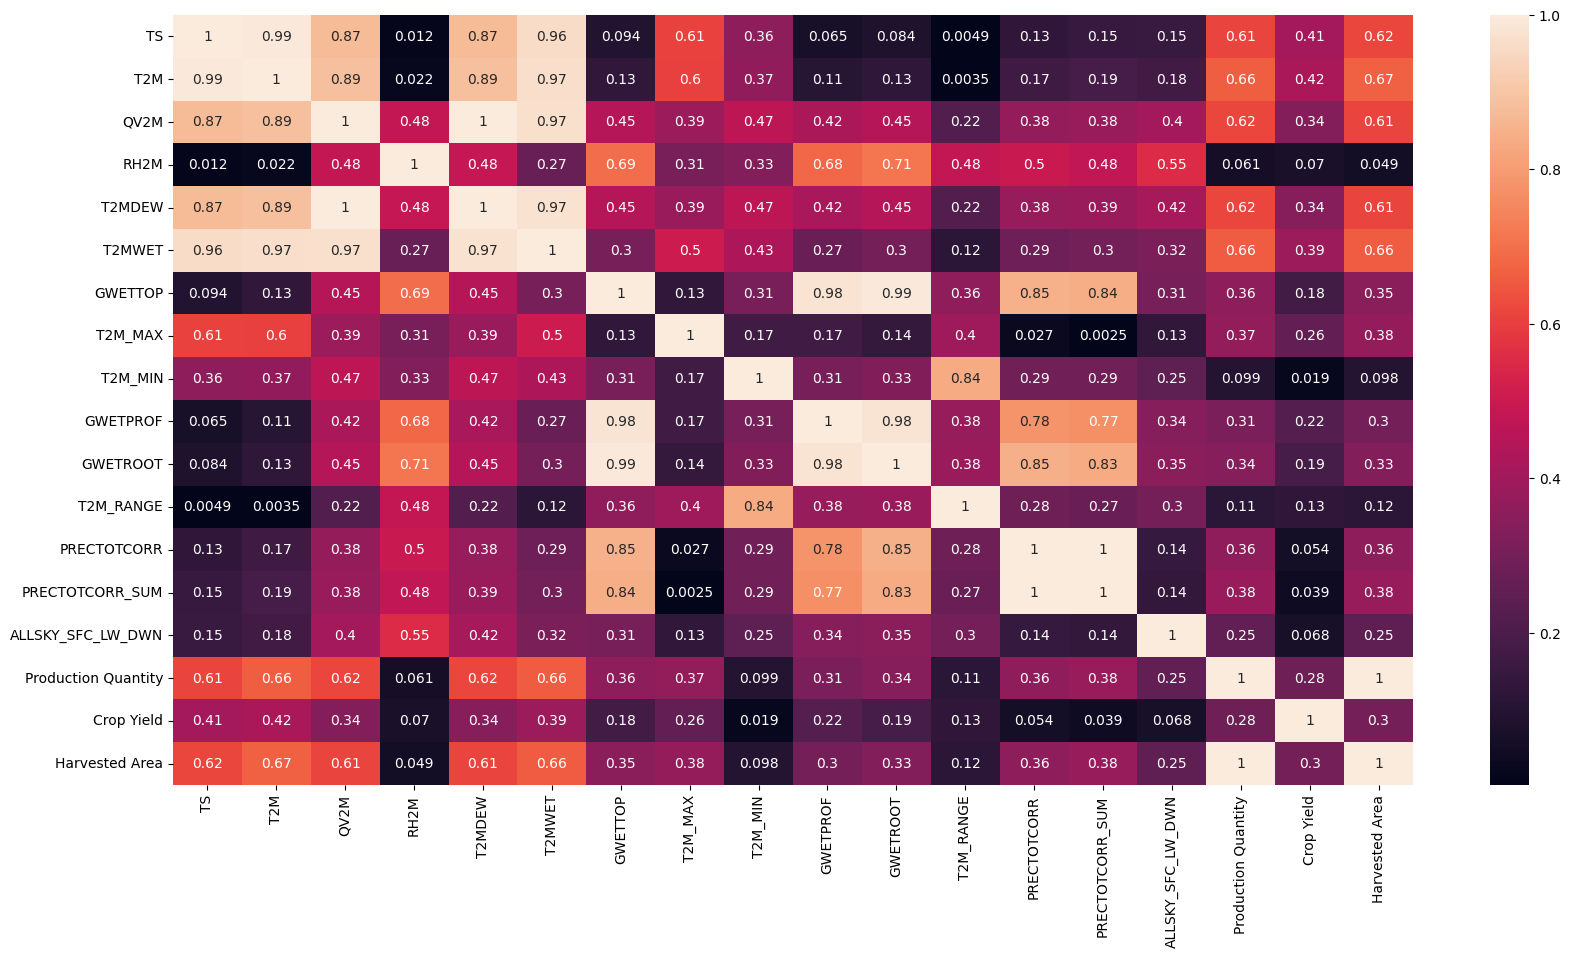

In [75]:
plt.figure(figsize=(20, 10))

cor = data.corr().abs()
sns.heatmap(cor, annot=True)
plt.show()

In [76]:
cor_target = abs(cor['Crop Yield'])
relevant_features = cor_target[cor_target > 0.1]
feature_names = [index for index, value in relevant_features.iteritems()]

feature_names.remove('Crop Yield')

print(feature_names)
print(len(feature_names))

['TS', 'T2M', 'QV2M', 'T2MDEW', 'T2MWET', 'GWETTOP', 'T2M_MAX', 'GWETPROF', 'GWETROOT', 'T2M_RANGE', 'Production Quantity', 'Harvested Area']
12


C:\Users\malik\AppData\Local\Temp\ipykernel_11688\2708782109.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  feature_names = [index for index, value in relevant_features.iteritems()]


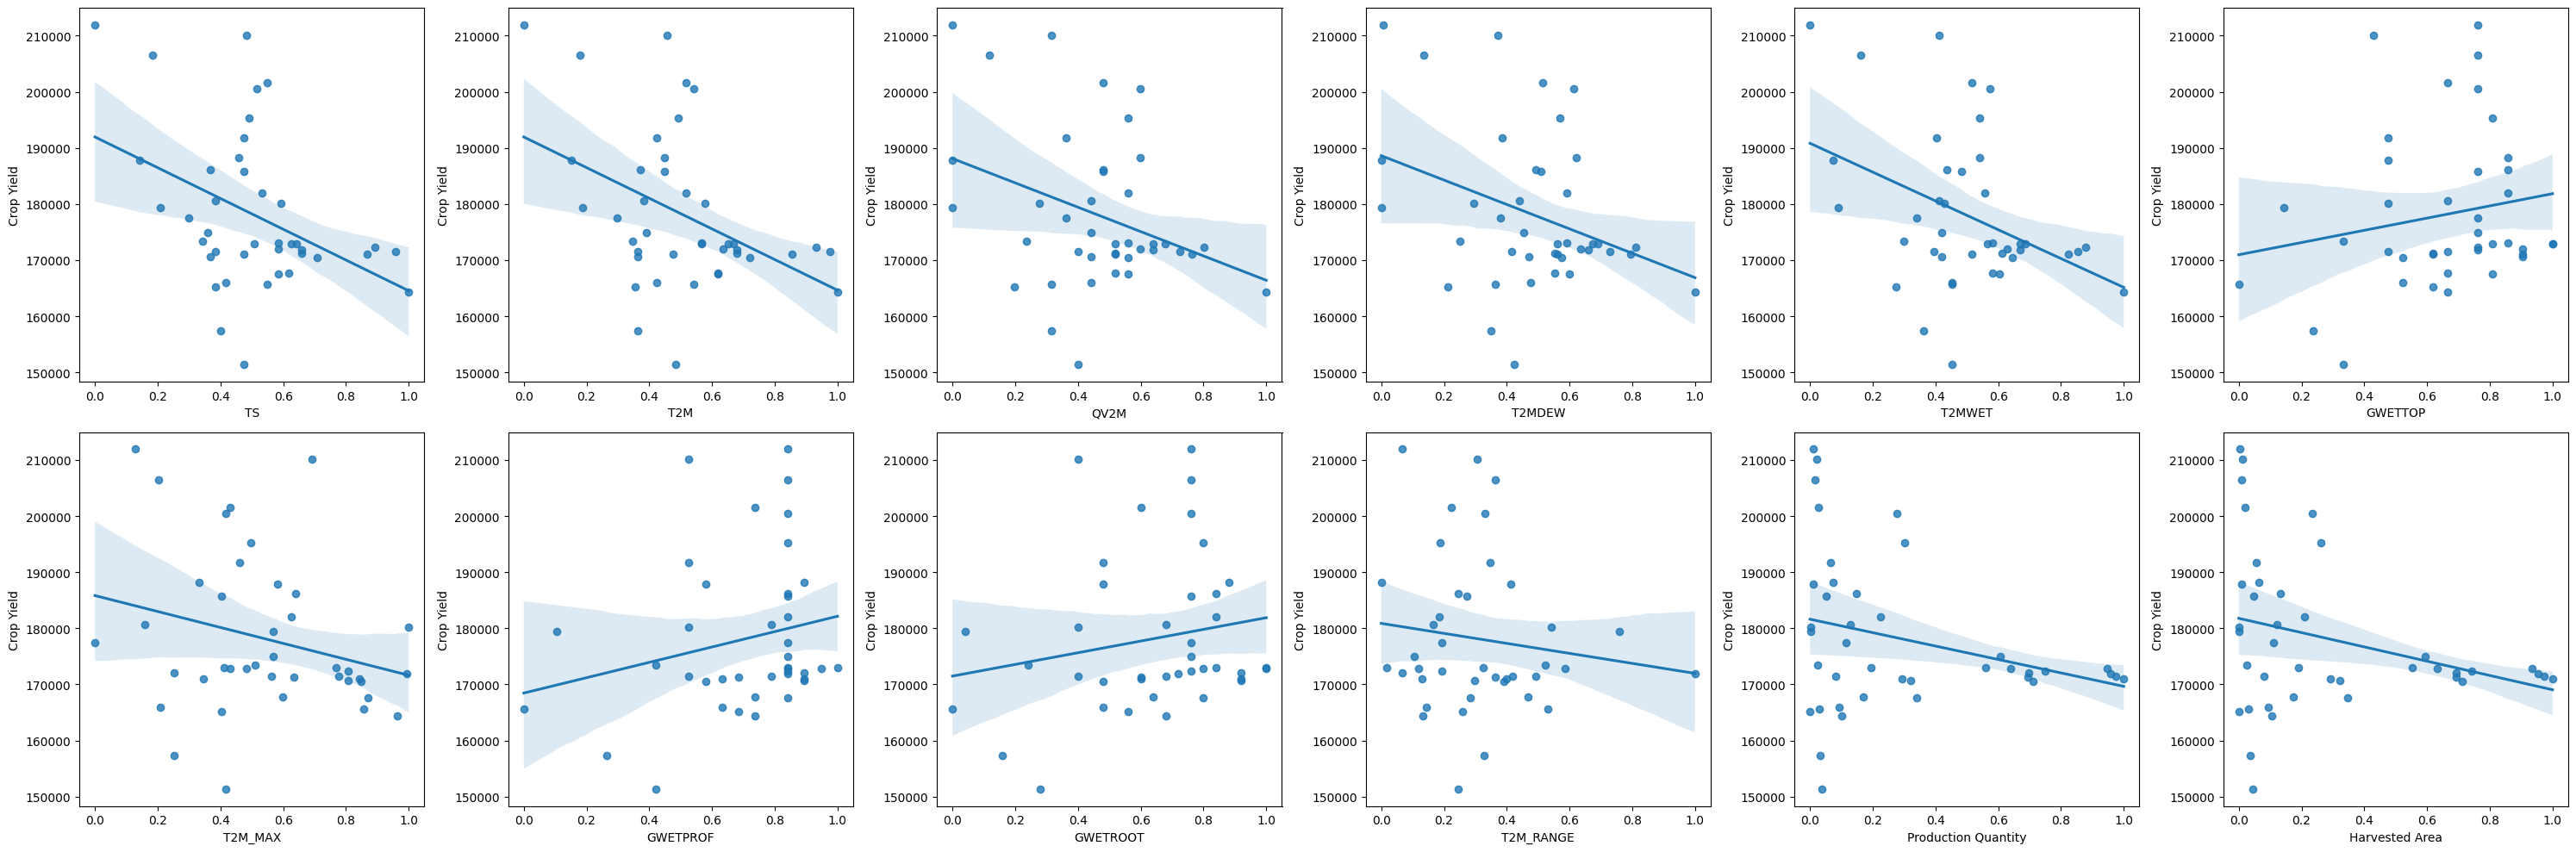

In [77]:
from sklearn import preprocessing

min_max_scaller = preprocessing.MinMaxScaler()
column_cels = feature_names

x = data.loc[:,column_cels]
y = data['Crop Yield']

x = pd.DataFrame(data=min_max_scaller.fit_transform(x), columns=column_cels)
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(30, 10))
index = 0
axs = axs.flatten()

for i, k in enumerate(column_cels):
  sns.regplot(y=y, x=x[k], ax=axs[i])

plt.tight_layout()

Splitting Training & Test Data

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=5)

Creating Machine Learning Model

In [79]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor(random_state=0, n_estimators=100)
regressor.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [84]:
prediction = regressor.predict(x_test)

print('Actual Value:\n{}'.format(y_test))
print('Model Prediction Value:\n {}'.format(prediction))

Actual Value:
20    186136
22    173026
24    200542
3     211947
23    182005
6     210132
Name: Crop Yield, dtype: int64
Model Prediction Value:
 [175221.61538462 174253.875      174253.875      194944.92857143
 183916.         187841.        ]


Metric Evaluation

In [85]:
from sklearn.metrics import mean_squared_error

score_map = {}

mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mse)

score_map['Ada Boost Regression'] = mse, rmse

print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

MSE: 266884669.90433988
RMSE: 16336.605213579101
